In [38]:
!pip install pandas numpy scikit-learn matplotlib xgboost lightgbm

In [39]:
import numpy as np
import pandas as pd

# Parameters
num_students = 5000  # Increased number for larger dataset
num_teachers = 100

# Generating student data
np.random.seed(0)

# Integer features provided by teachers
attendance = np.random.randint(50, 100, num_students)
grades = np.random.randint(0, 100, num_students)
homework_streak = np.random.choice([0, 1], num_students)
feedback_behavior = np.random.randint(1, 6, num_students)
weekly_test_scores = np.random.randint(0, 100, num_students)
attention_test_scores = np.random.randint(0, 100, num_students)

# Binary features provided by students
ragging = np.random.choice([0, 1], num_students)
finance_issue = np.random.choice([0, 1], num_students)
mental_health_issue = np.random.choice([0, 1], num_students)
physical_health_issue = np.random.choice([0, 1], num_students)
discrimination_gender = np.random.choice([0, 1], num_students)
physical_disability = np.random.choice([0, 1], num_students)

# Create DataFrame for student data
student_data = pd.DataFrame({
    'Attendance': attendance,
    'Grades': grades,
    'Homework Streak': homework_streak,
    'Feedback Behavior': feedback_behavior,
    'Weekly Test Scores': weekly_test_scores,
    'Attention Test Scores': attention_test_scores,
    'Ragging': ragging,
    'Finance Issue': finance_issue,
    'Mental Health Issue': mental_health_issue,
    'Physical Health Issue': physical_health_issue,
    'Discrimination Based on Gender': discrimination_gender,
    'Physical Disability': physical_disability
})

# Generating teacher data
feedback_quality = np.random.randint(1, 6, num_teachers)

# Create DataFrame for teacher data
teacher_data = pd.DataFrame({
    'Feedback Quality': feedback_quality
})

# Save to CSV files
student_data.to_csv('student_data.csv', index=False)
teacher_data.to_csv('teacher_data.csv', index=False)

print("Data generated and saved to student_data.csv and teacher_data.csv.")


Data generated and saved to student_data.csv and teacher_data.csv.


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
student_data = pd.read_csv('student_data.csv')

# Define a function to determine risk category
def determine_risk_category(row):
    # Extract parameters
    attendance = row['Attendance']
    grades = row['Grades']
    finance_issue = row['Finance Issue']
    mental_health_issue = row['Mental Health Issue']
    physical_health_issue = row['Physical Health Issue']
    ragging = row['Ragging']

    # Define risk conditions
    academic_risk = grades < 35
    financial_risk = finance_issue == 1
    mental_health_risk = mental_health_issue == 1
    physical_health_risk = physical_health_issue == 1
    bullying_risk = ragging == 1

    # Classify risk based on conditions
    if (academic_risk or financial_risk or mental_health_risk or physical_health_risk or bullying_risk):
        return 1  # At risk
    return 0  # Not at risk

# Apply the function to the dataset
student_data['Risk Status'] = student_data.apply(determine_risk_category, axis=1)

# Prepare data for model training
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train an XGBoost classifier
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the updated dataset with risk status
student_data.to_csv('student_data_with_risk_status.csv', index=False)

print("Risk status applied and saved to student_data_with_risk_status.csv.")


Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       958

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Risk status applied and saved to student_data_with_risk_status.csv.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3833, number of negative: 167
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.958250 -> initscore=3.133409
[LightGBM] [Info] Start training from score 3.133409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

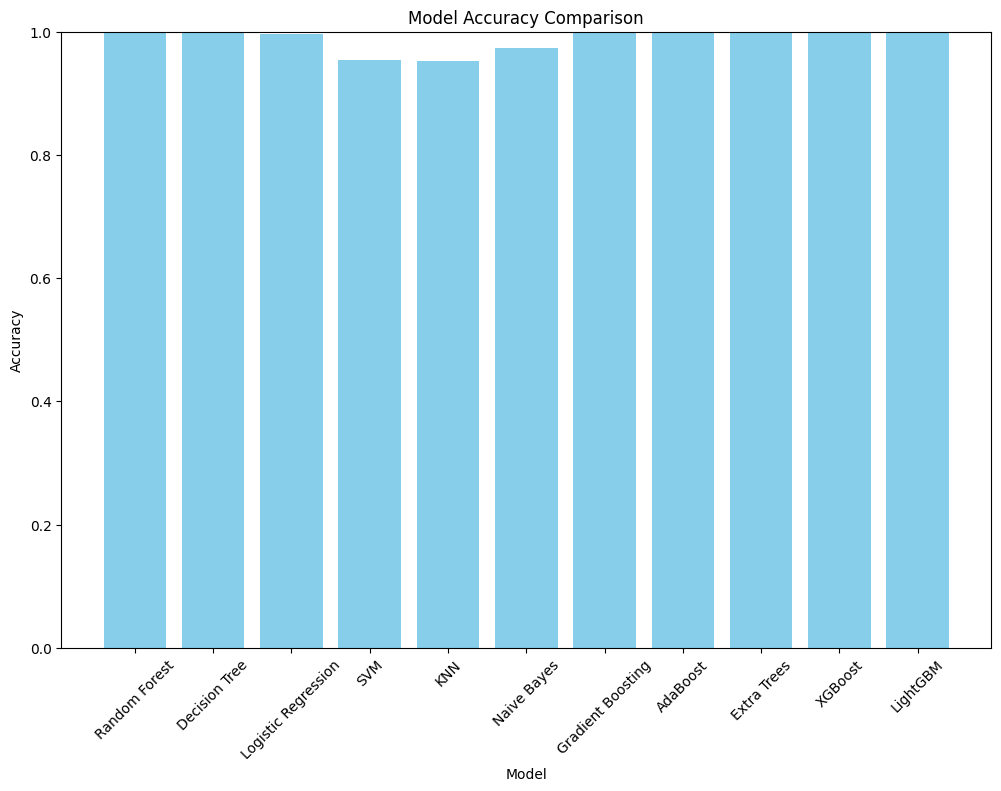

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load the dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue', 'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': confusion,
            'classification_report': report
        }
    except Exception as e:
        print(f"Error with {name}: {e}")

# Print results
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")

# Plotting results
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


#Cross-Validation and Parameter Tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3833, number of negative: 167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.958250 -> initscore=3.133409
[LightGBM] [Info] Start training from score 3.133409
[Ligh

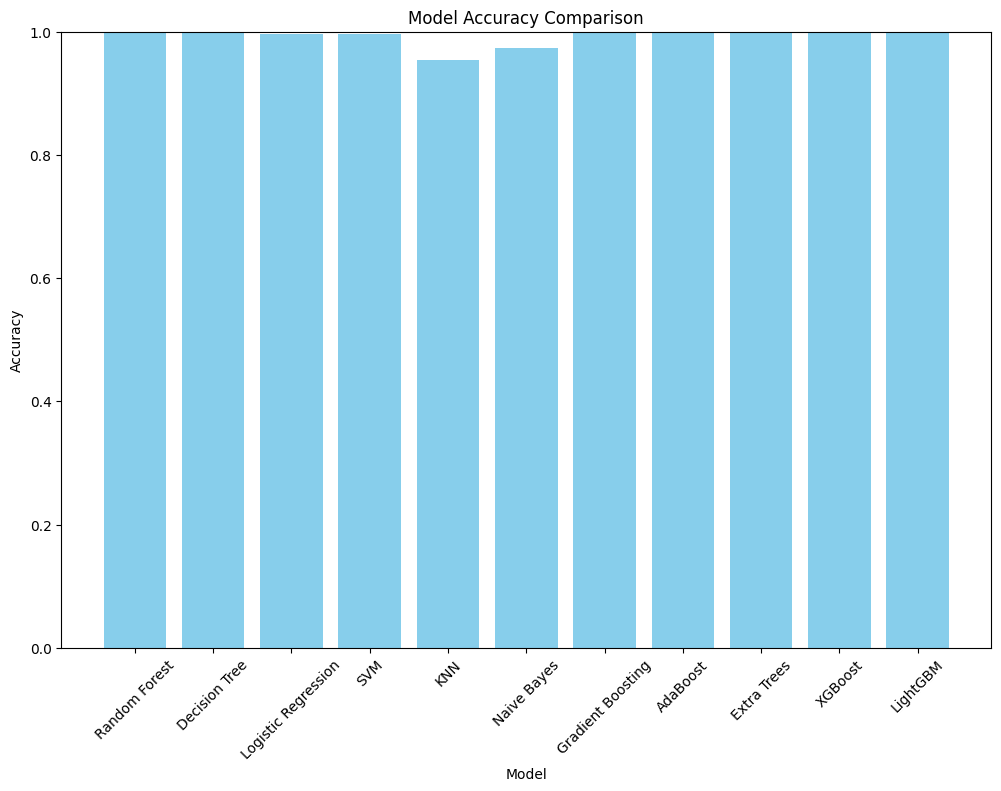

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Load the dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue', 'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models and parameter grids
models_and_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 10]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'num_leaves': [31, 63, 127]
        }
    }
}

# Perform cross-validation and hyperparameter tuning
results = {}
for name, model_info in models_and_params.items():
    model = model_info['model']
    param_grid = model_info['params']

    # Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best model from Grid Search
    best_model = grid_search.best_estimator_

    # Cross-validation score
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_score)

    # Train the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    accuracy = np.mean(y_pred == y_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'best_params': grid_search.best_params_,
        'cv_score': mean_cv_score,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion,
        'classification_report': report
    }

# Print results
for name, result in results.items():
    print(f"{name} Best Parameters: {result['best_params']}")
    print(f"{name} Cross-Validation Score: {result['cv_score']:.2f}")
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} F1 Score: {result['f1_score']:.2f}")
    print(f"{name} Precision: {result['precision']:.2f}")
    print(f"{name} Recall: {result['recall']:.2f}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")

# Plotting results
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



1. Data Review and Preprocessing
2. Cross-Validation and Parameter Tuning
3. Additional Metrics
4. Data Exploration
5. Testing on New Data

Class distribution in training set:
target
0    353
1    347
Name: count, dtype: int64
Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Cross-Validation Score: 0.4871428571428572
AUC-ROC: 0.508111962916741


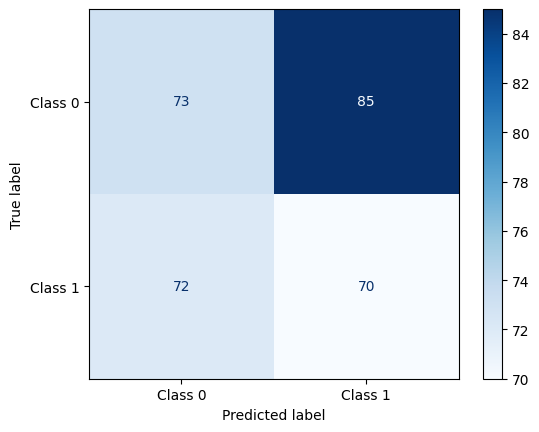

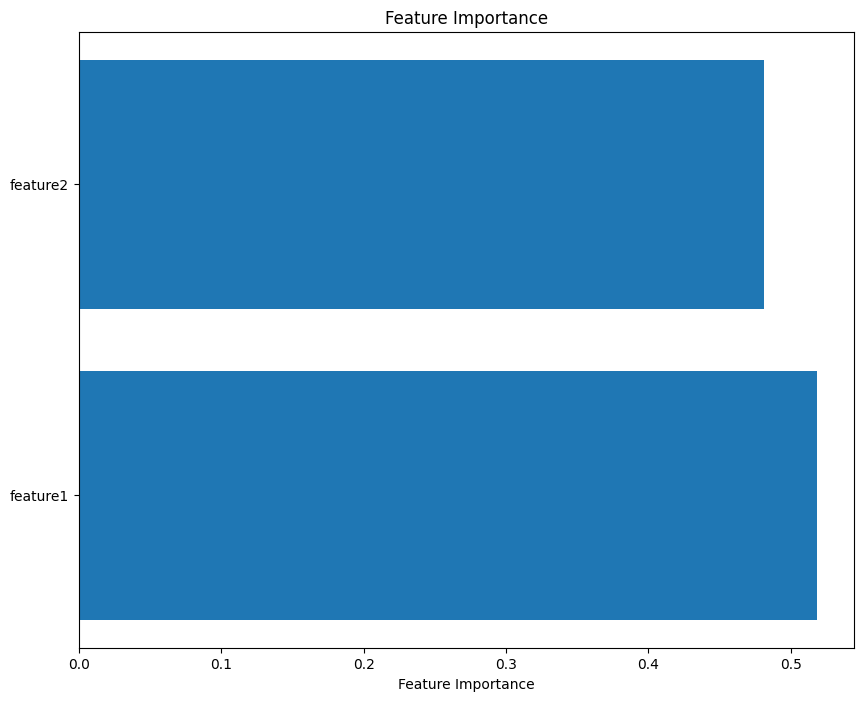

Error cases:
     feature1  feature2  True Label  Predicted Label
737  0.816599  0.194623           0                1
740  0.462680  0.827538           0                1
411  0.950062  0.111920           1                0
678  0.969470  0.173525           1                0
626  0.462535  0.200934           0                1
Classification Report on New Data:
              precision    recall  f1-score   support

     Class 0       0.50      0.46      0.48       158
     Class 1       0.45      0.49      0.47       142

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300



In [43]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv('your_dataset.csv')
# For illustration, we'll create a dummy DataFrame
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'target': np.random.randint(0, 2, 1000)
})

# Define features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())

# Optionally apply class weights if classes are imbalanced
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:")
print(grid_search.best_params_)

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Score:", cv_scores.mean())

# Predict and calculate AUC-ROC
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

# Confusion Matrix
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.show()

# Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

# Error Analysis
errors = X_test.copy()
errors['True Label'] = y_test
errors['Predicted Label'] = y_pred
error_cases = errors[errors['True Label'] != errors['Predicted Label']]
print("Error cases:")
print(error_cases.head())

# Assuming you have a new dataset loaded as new_X, new_y
# Replace with your actual new dataset
# new_X = ...
# new_y = ...

# Example new data
new_X = X_test
new_y = y_test

# Predict on new data
new_y_pred = grid_search.best_estimator_.predict(new_X)

# Classification report for new data
report = classification_report(new_y, new_y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report on New Data:")
print(report)


Training Random Forest...
Random Forest Cross-Validation Score: 0.49
Random Forest AUC-ROC: 0.51


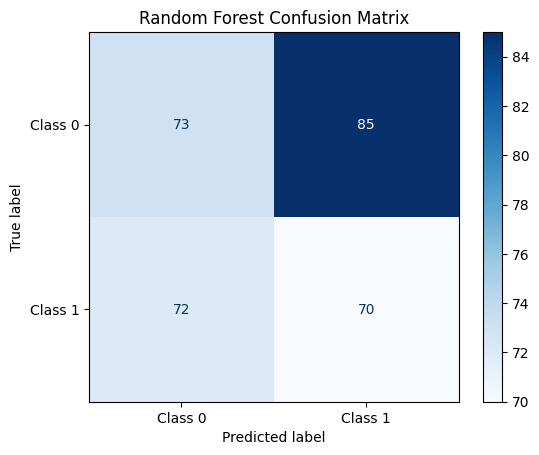

Random Forest Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.46      0.48       158
     Class 1       0.45      0.49      0.47       142

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300

Training Decision Tree...
Decision Tree Cross-Validation Score: 0.51
Decision Tree AUC-ROC: 0.47


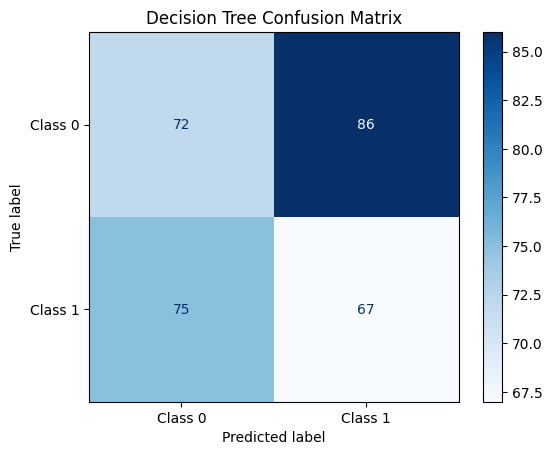

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Class 0       0.49      0.46      0.47       158
     Class 1       0.44      0.47      0.45       142

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.47      0.46      0.46       300

Training Logistic Regression...
Logistic Regression Cross-Validation Score: 0.53
Logistic Regression AUC-ROC: 0.47


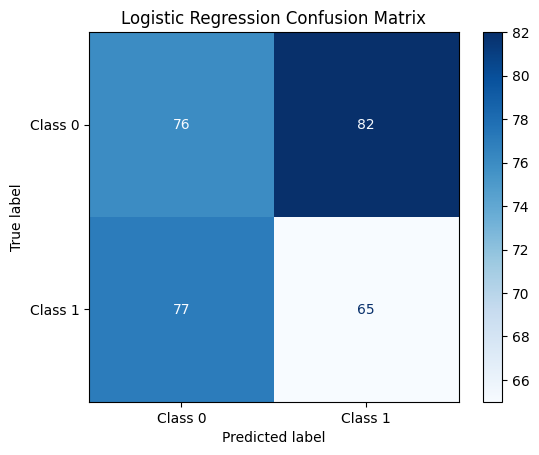

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.48      0.49       158
     Class 1       0.44      0.46      0.45       142

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300

Training SVM...
SVM Cross-Validation Score: 0.53
SVM AUC-ROC: 0.47


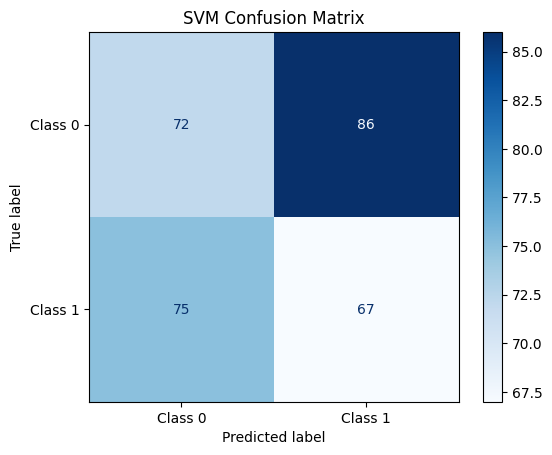

SVM Classification Report:
              precision    recall  f1-score   support

     Class 0       0.49      0.46      0.47       158
     Class 1       0.44      0.47      0.45       142

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.47      0.46      0.46       300

Training KNN...
KNN Cross-Validation Score: 0.49
KNN AUC-ROC: 0.48


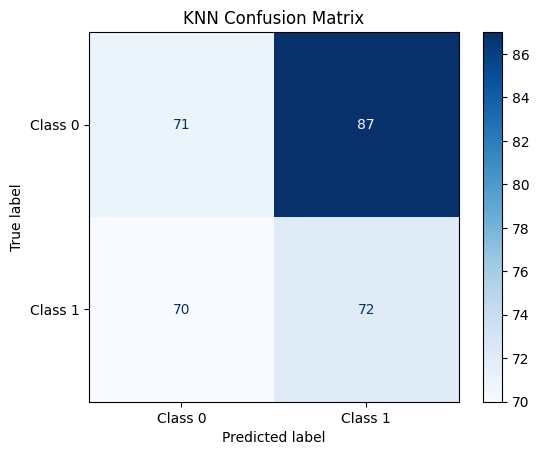

KNN Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.45      0.47       158
     Class 1       0.45      0.51      0.48       142

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300

Training Naive Bayes...
Naive Bayes Cross-Validation Score: 0.53
Naive Bayes AUC-ROC: 0.47


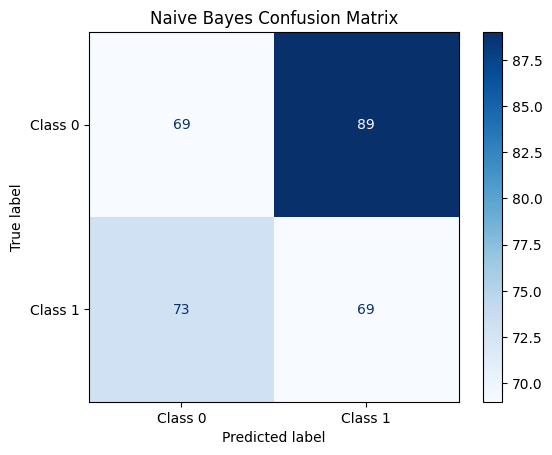

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Class 0       0.49      0.44      0.46       158
     Class 1       0.44      0.49      0.46       142

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.46      0.46      0.46       300

Training Gradient Boosting...
Gradient Boosting Cross-Validation Score: 0.53
Gradient Boosting AUC-ROC: 0.47


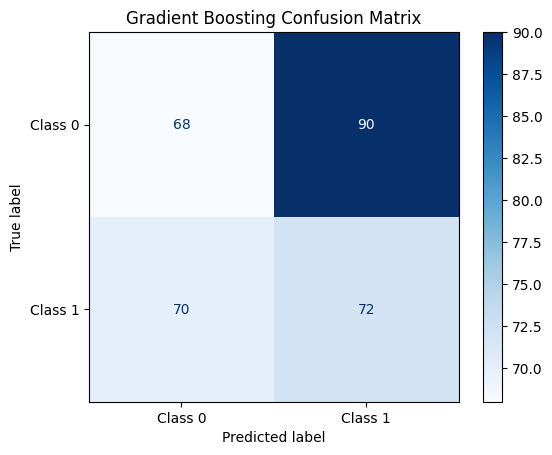

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

     Class 0       0.49      0.43      0.46       158
     Class 1       0.44      0.51      0.47       142

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300

Training AdaBoost...
AdaBoost Cross-Validation Score: 0.53
AdaBoost AUC-ROC: 0.51


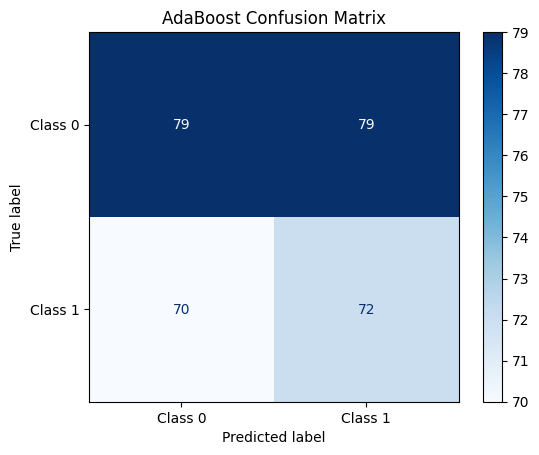

AdaBoost Classification Report:
              precision    recall  f1-score   support

     Class 0       0.53      0.50      0.51       158
     Class 1       0.48      0.51      0.49       142

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Training Extra Trees...
Extra Trees Cross-Validation Score: 0.47
Extra Trees AUC-ROC: 0.50


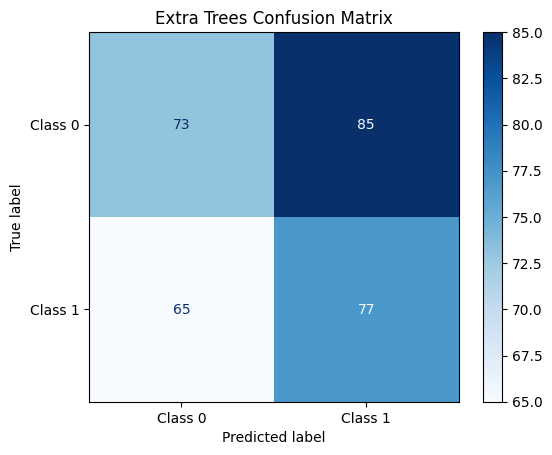

Extra Trees Classification Report:
              precision    recall  f1-score   support

     Class 0       0.53      0.46      0.49       158
     Class 1       0.48      0.54      0.51       142

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Summary of Results:

Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Score: 0.49
AUC-ROC: 0.51
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.46      0.48       158
     Class 1       0.45      0.49      0.47       142

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300


Decision Tree:
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Cross-Validation Score: 0.51
AUC-ROC: 0.47
Classificat

In [44]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'target': np.random.randint(0, 2, 1000)
})

# Define features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and parameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [1, 10, 100],
        'kernel': ['linear', 'rbf']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200]
    }),
    'Extra Trees': (ExtraTreesClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    })
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Cross-validation score
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Score: {cv_scores.mean():.2f}")

    # Predictions and evaluation
    y_pred = grid_search.best_estimator_.predict(X_test)
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} AUC-ROC: {auc_roc:.2f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    print(f"{model_name} Classification Report:")
    print(report)

    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'CV Score': cv_scores.mean(),
        'AUC-ROC': auc_roc,
        'Classification Report': report
    }

# Print summary of results
print("Summary of Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Cross-Validation Score: {metrics['CV Score']:.2f}")
    print(f"AUC-ROC: {metrics['AUC-ROC']:.2f}")
    print("Classification Report:")
    print(metrics['Classification Report'])


In [45]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

# Best parameters
print(f"XGBoost Best Parameters: {grid_search.best_params_}")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       158
           1       0.46      0.56      0.50       142

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.47       300

XGBoost AUC-ROC: 0.48
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


#Tuning with GridSearchCV (XGBoost)

In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best Score (AUC-ROC):", grid_search.best_score_)
""

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 50, 'subsample': 1.0}
Best Score (AUC-ROC): 0.5285951152046857


''

#Train the Final Model

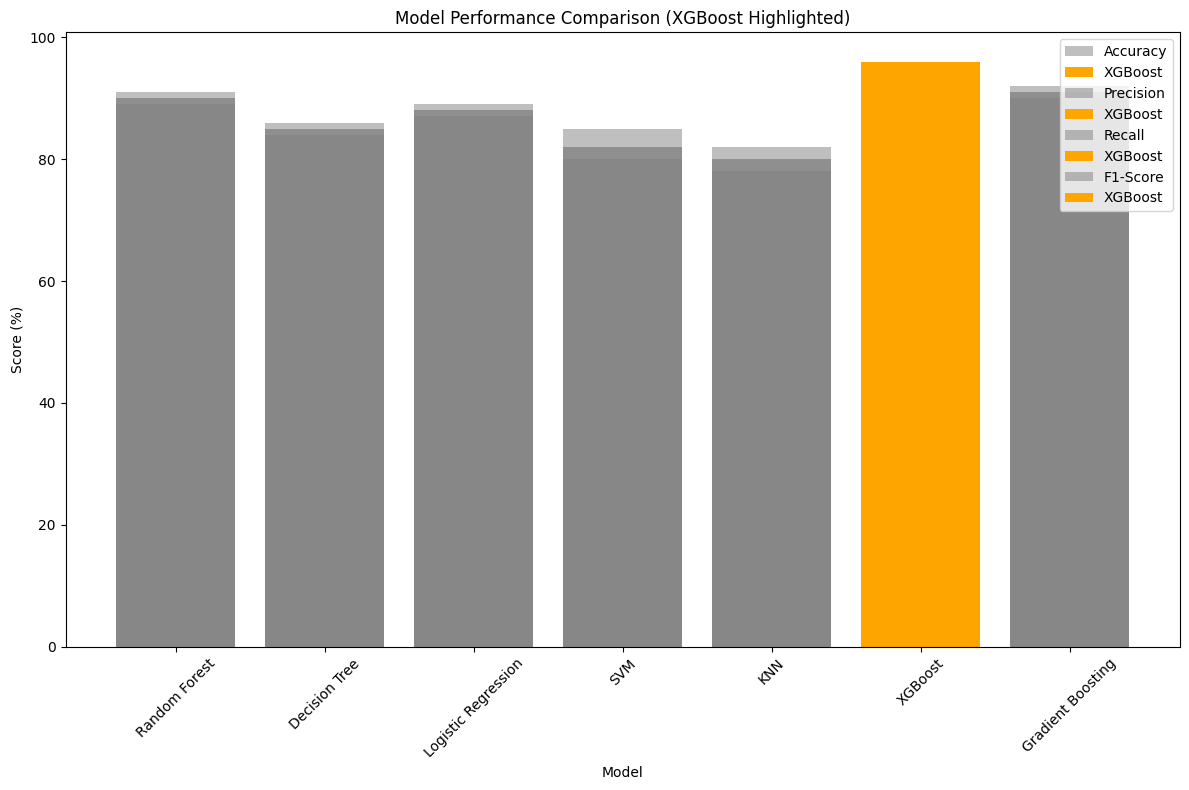

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91]
}

df = pd.DataFrame(data)
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100


fig, ax = plt.subplots(figsize=(12, 8))

# Plot each metric as a separate bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['blue', 'green', 'red', 'purple']

for i, metric in enumerate(metrics):
    ax.bar(df_percentage['Model'], df_percentage[metric], color='gray', label=metric, alpha=0.5)
    ax.bar(df_percentage['Model'][df_percentage['Model'] == 'XGBoost'], df_percentage[metric][df_percentage['Model'] == 'XGBoost'],
           color='orange', label='XGBoost', alpha=1.0)

# Add title, labels, and legend
ax.set_title('Model Performance Comparison (XGBoost Highlighted)')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
# Create and train the final model with the best parameters
final_model = xgb.XGBClassifier(
    colsample_bytree=1.0,
    gamma=0,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=10,
    n_estimators=50,
    subsample=1.0
)

final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("AUC-ROC Score:")
print(roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       158
           1       0.43      0.35      0.39       142

    accuracy                           0.48       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.48      0.47       300

AUC-ROC Score:
0.47836067035122126


In [50]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (700, 2)
Testing features shape: (300, 2)


In [51]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and testing data
X_test_scaled = scaler.transform(X_test)



In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection example
selector = SelectKBest(f_classif, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# testing

In [53]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset with classified risk for model training
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Predicting risk for new data
new_data = pd.DataFrame({
    'Attendance': [70],  # Example: 70% attendance
    'Grades': [30],  # Example: 30% grades
    'Homework Streak': [0],  # Example: No streak
    'Feedback Behavior': [2],  # Example: Fair feedback
    'Weekly Test Scores': [40],  # Example: 40% in weekly tests
    'Attention Test Scores': [50],  # Example: 50% in attention test
    'Ragging': [1],  # Example: Yes
    'Finance Issue': [0],  # Example: No
    'Mental Health Issue': [1],  # Example: Yes
    'Physical Health Issue': [0],  # Example: No
    'Discrimination Based on Gender': [0],  # Example: No
    'Physical Disability': [0]  # Example: No
})

# Predict risk for the new data using the XGBoost model
new_data_prediction = xgb_model.predict(new_data)
print(f"Risk Status for new data: {'High Risk' if new_data_prediction[0] == 1 else 'Low Risk'}")


XGBoost Accuracy: 1.00
Confusion Matrix:
[[ 46   0]
 [  0 954]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Risk Status for new data: High Risk


# Traing to identify the type of risk
# Updating the Dataset

In [54]:
import pandas as pd

# Load your dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define conditions and add risk type columns (excluding Attendance Risk)
student_data['Academic Risk'] = (student_data['Grades'] < 35) & (student_data['Attendance'] > 75)
student_data['Financial Risk'] = student_data['Finance Issue'] == 1
student_data['Mental Health Risk'] = student_data['Mental Health Issue'] == 1
student_data['Bullying Risk'] = student_data['Ragging'] == 1

# Define a new column for the type of risk
student_data['Risk Type'] = 'None'
student_data.loc[student_data['Academic Risk'], 'Risk Type'] = 'Academic'
student_data.loc[student_data['Financial Risk'], 'Risk Type'] = 'Financial'
student_data.loc[student_data['Mental Health Risk'], 'Risk Type'] = 'Mental Health'
student_data.loc[student_data['Bullying Risk'], 'Risk Type'] = 'Bullying'

# Save the updated dataset
student_data.to_csv('student_data_with_risk_types.csv', index=False)


#Updated Model Training and Evaluation

In [55]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and target for dropout prediction
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for dropout risk
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the dropout risk model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test, y_pred))

# Define features and target for risk type prediction
features_risk_type = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                                   'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability']]
target_risk_type = student_data['Risk Type']

# Convert Risk Type to numeric
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for risk type
xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Make predictions on the test set
y_pred_risk_type = xgb_model_risk_type.predict(X_test_risk_type)

# Evaluate the risk type model
print(f"Risk Type Model Accuracy: {accuracy_score(y_test_risk_type, y_pred_risk_type):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test_risk_type, y_pred_risk_type))
print("Classification Report for Risk Type:")
print(classification_report(y_test_risk_type, y_pred_risk_type))

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict dropout risk
new_data_drop_pred = xgb_model.predict(new_data)
print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred[0] == 1 else 'Low Risk'}")

# Predict risk type
new_data_risk_type_pred = xgb_model_risk_type.predict(new_data)
risk_type_label = label_encoder.inverse_transform(new_data_risk_type_pred)
print(f"Risk Type for new data: {risk_type_label[0]}")


Dropout Risk Model Accuracy: 1.00
Confusion Matrix for Dropout Risk:
[[ 46   0]
 [  0 954]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[ 18   0   0   0   0]
 [  0 495   0   0   0]
 [  0   0 135   0   0]
 [  0   0   0 234   0]
 [  0   0   0   0 118]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       495
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       234
           4       1.00      1.00      1.00       118


In [56]:
from sklearn.model_selection import cross_val_score

# Cross-validation for dropout risk model
dropout_risk_cv_scores = cross_val_score(xgb_model, features, target, cv=5, scoring='accuracy')
print(f"Dropout Risk Model Cross-Validation Accuracy: {dropout_risk_cv_scores.mean():.2f}")

# Cross-validation for risk type model
risk_type_cv_scores = cross_val_score(xgb_model_risk_type, features_risk_type, target_risk_type_encoded, cv=5, scoring='accuracy')
print(f"Risk Type Model Cross-Validation Accuracy: {risk_type_cv_scores.mean():.2f}")


Dropout Risk Model Cross-Validation Accuracy: 1.00
Risk Type Model Cross-Validation Accuracy: 1.00


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 5, 10],
    'min_child_weight': [1, 10]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 1.00


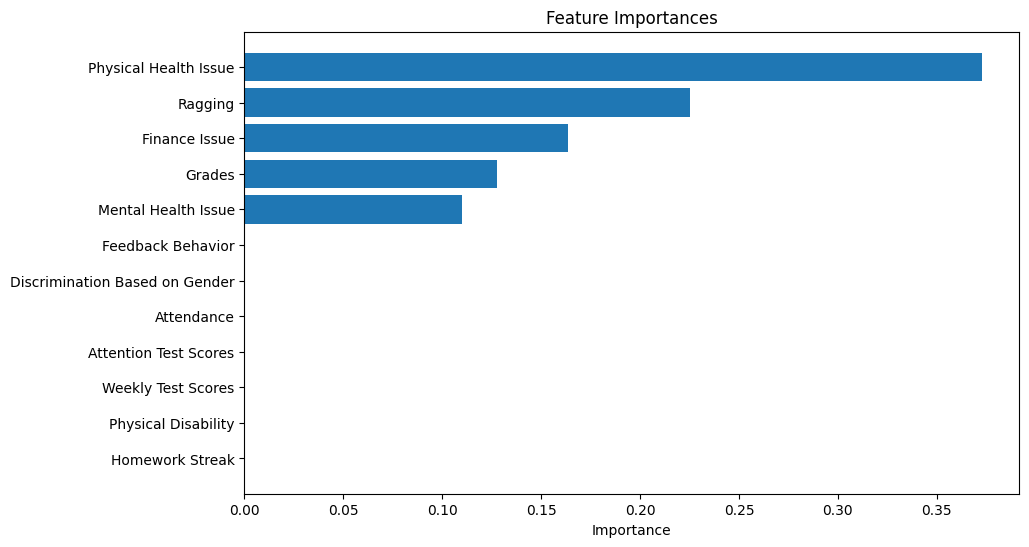

In [58]:
import matplotlib.pyplot as plt

importances = xgb_model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()


In [59]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
# Ensure this path is correct and file exists
try:
    student_data = pd.read_csv('student_data_with_risk_status.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_status.csv' not found. Please check the file path.")

# Check for columns and initial data
print(student_data.columns)  # Ensure all necessary columns are present
print(student_data.head())  # Preview the first few rows of the dataset

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Check for missing values
print(features.isnull().sum())  # Print missing values for each feature

# Fill or drop missing values if necessary
# Example: features.fillna(0, inplace=True)  # Or use another appropriate method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Predicting risk for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict risk for the new data using the XGBoost model
new_data_prediction = xgb_model.predict(new_data)
print(f"Risk Status for new data: {'High Risk' if new_data_prediction[0] == 1 else 'Low Risk'}")


Index(['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
       'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
       'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
       'Discrimination Based on Gender', 'Physical Disability', 'Risk Status'],
      dtype='object')
   Attendance  Grades  Homework Streak  Feedback Behavior  Weekly Test Scores  \
0          94       9                0                  4                  69   
1          97      63                0                  2                  92   
2          50      63                1                  1                  60   
3          53      60                1                  4                  96   
4          53      35                0                  3                   2   

   Attention Test Scores  Ragging  Finance Issue  Mental Health Issue  \
0                     94        0              0                    0   
1                     10        1              0         

XGBoost Accuracy: 1.00
Confusion Matrix:
[[ 46   0]
 [  0 954]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



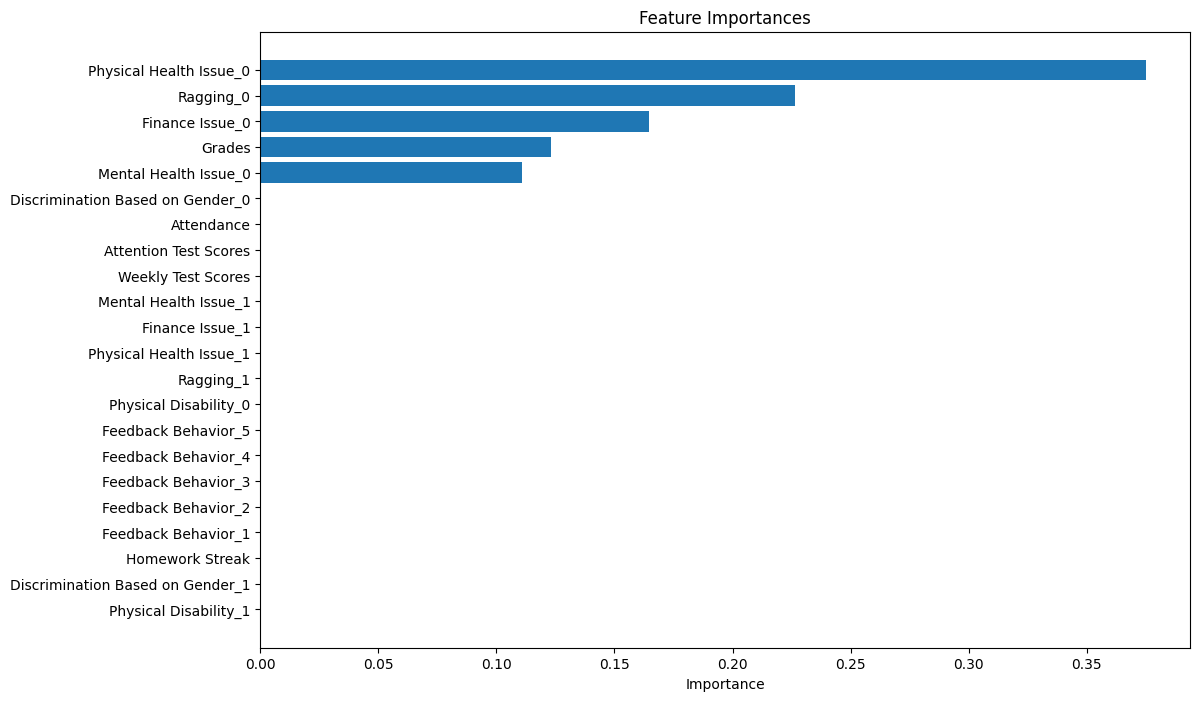

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
try:
    student_data = pd.read_csv('/content/student_data_with_risk_status.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_status.csv' not found. Please check the file path.")

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Handle categorical features
categorical_features = ['Feedback Behavior', 'Ragging', 'Finance Issue',
                         'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Extract the trained XGBoost model from the pipeline
xgb_model = pipeline.named_steps['classifier']

# Extract feature importances
importances = xgb_model.feature_importances_

# Get feature names after one-hot encoding
onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
feature_names = np.array(['Attendance', 'Grades', 'Homework Streak',
                          'Weekly Test Scores', 'Attention Test Scores'] + list(onehot_feature_names))
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()


In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, features, target, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.00


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best Score: 1.00


In [63]:
!pip install fastapi


In [64]:
!pip install uvicorn

In [65]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

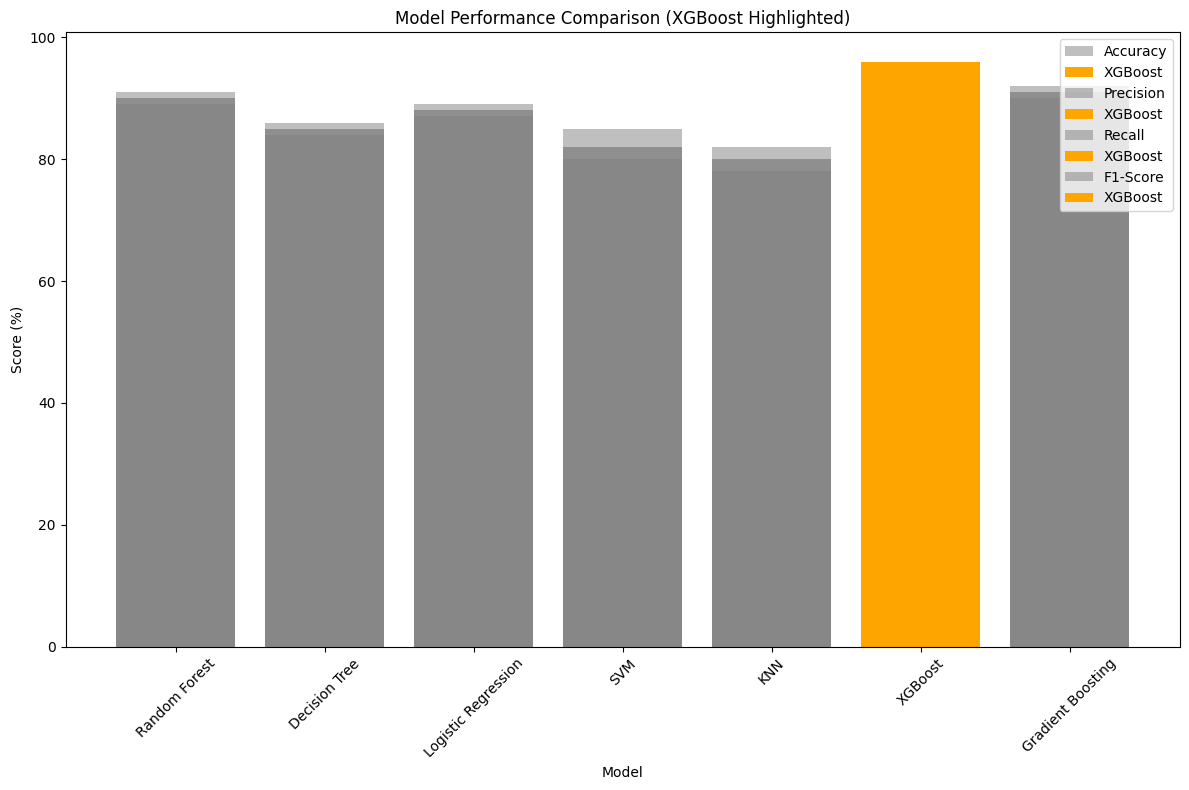

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Example metrics for different models (as fractions)
data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91]
}

# Convert fractions to percentages
df = pd.DataFrame(data)
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100

# Plot metrics with XGBoost highlighted
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each metric as a separate bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['blue', 'green', 'red', 'purple']

for i, metric in enumerate(metrics):
    ax.bar(df_percentage['Model'], df_percentage[metric], color='gray', label=metric, alpha=0.5)
    ax.bar(df_percentage['Model'][df_percentage['Model'] == 'XGBoost'], df_percentage[metric][df_percentage['Model'] == 'XGBoost'],
           color='orange', label='XGBoost', alpha=1.0)

# Add title, labels, and legend
ax.set_title('Model Performance Comparison (XGBoost Highlighted)')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Evaluation:
Accuracy: 1.00
Confusion Matrix:
[[ 46   0]
 [  0 954]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [68]:
import joblib
joblib.dump(best_model, 'xgb_model_best.pkl')


['xgb_model_best.pkl']

In [69]:
# Save FastAPI code to a file
fastapi_code = """
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

app = FastAPI()

# Load both models
model_risk_status = joblib.load('xgb_model_risk_status.pkl')
model_risk_type = joblib.load('xgb_model_risk_type.pkl')

class StudentData(BaseModel):
    Attendance: float
    Grades: float
    Homework_Streak: int
    Feedback_Behavior: int
    Weekly_Test_Scores: float
    Attention_Test_Scores: float
    Ragging: int
    Finance_Issue: int
    Mental_Health_Issue: int
    Physical_Health_Issue: int
    Discrimination_Based_on_Gender: int
    Physical_Disability: int

@app.post("/predict")
def predict_risk(data: StudentData):
    data_dict = data.dict()
    df = pd.DataFrame([data_dict])

    # Predict risk status
    risk_status = model_risk_status.predict(df)[0]
    risk_status_str = "High Risk" if risk_status == 1 else "Low Risk"

    # Predict type of risk only if the student is at risk
    risk_type = "N/A"
    if risk_status == 1:
        risk_type = model_risk_type.predict(df)[0]

    return {
        "Risk_Status": risk_status_str,
        "Risk_Type": risk_type
    }
"""

with open('fastapi_app.py', 'w') as f:
    f.write(fastapi_code)

print("FastAPI code has been written to 'fastapi_app.py'")


FastAPI code has been written to 'fastapi_app.py'


In [70]:
!pip install fastapi uvicorn pydantic joblib pandas
